C:\Users\hpthakur.STUDENT\AppData\Local\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


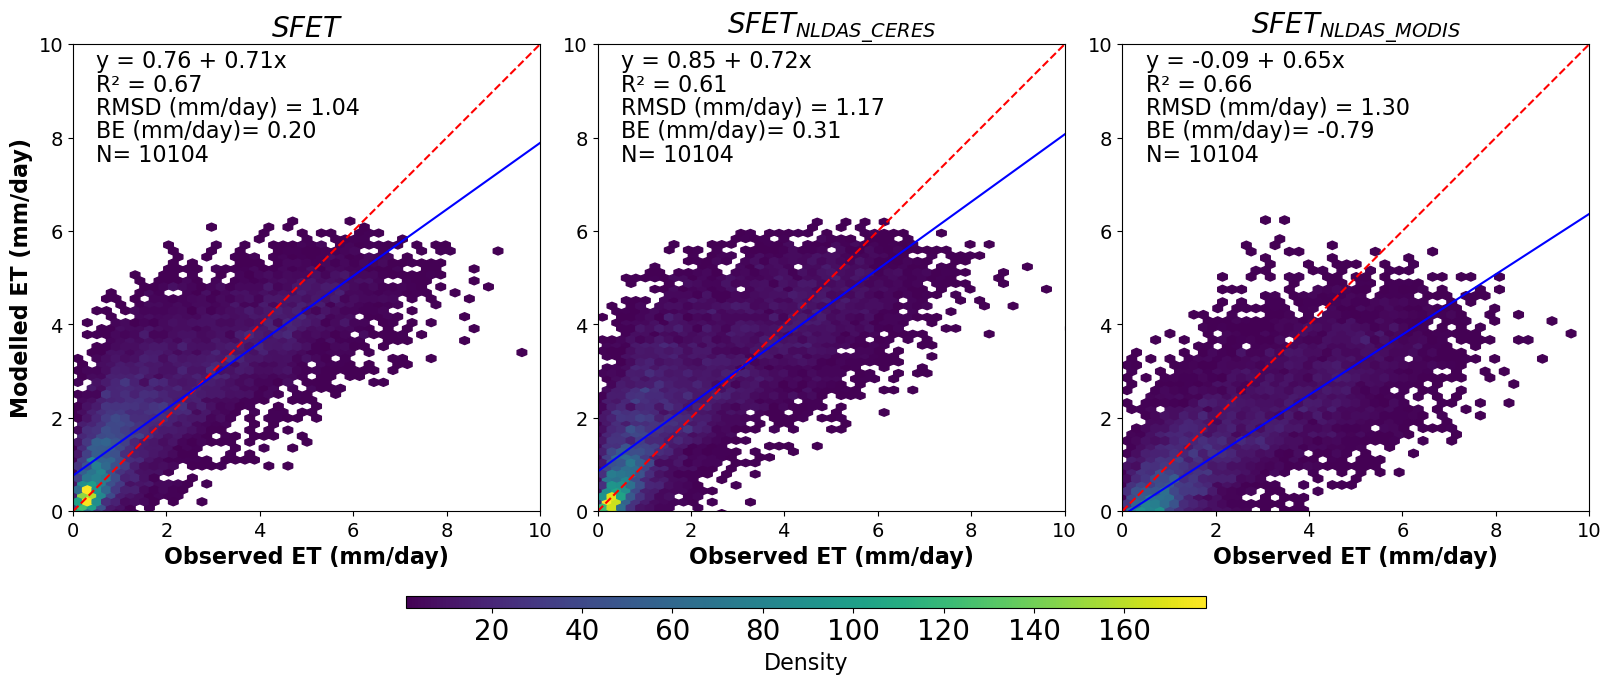

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import rcParams

rcParams.update({'font.family': 'sans-serif', 'font.size': 20})

file_path = "D:/Script/Data/Pooled_SFET_conf.xlsx"
daily_data = pd.read_excel(file_path)

data_list = {
    "SFET_Sitedata": pd.DataFrame({
        "measured": daily_data["LE_Obs"],
        "modelled": daily_data["LE_SFET"]
    }),
    "SFET_CERES_NLDAS": pd.DataFrame({
        "measured": daily_data["LE_Obs"],
        "modelled": daily_data["SFET_CERES_NLDAS_LE"]
    }),
    "SFET_NLDAS_MODIS": pd.DataFrame({
        "measured": daily_data["LE_Obs"],
        "modelled": daily_data["SFET_NLDAS_MODIS_LE"]
    })
}

def calc_metrics(data):
    mae = np.mean(np.abs(data["modelled"] - data["measured"]))
    rmse = np.sqrt(np.mean((data["modelled"] - data["measured"]) ** 2))
    pbias = np.mean(data["modelled"] - data["measured"])
    slope, intercept = np.polyfit(data["measured"], data["modelled"], 1)
    r2 = np.corrcoef(data["measured"], data["modelled"])[0, 1] ** 2
    n = len(data["measured"])
    return {"MAE": mae, "RMSE": rmse, "Pbias": pbias, "Slope": slope, "Intercept": intercept, "R2": r2, "N": n}


fig, axes = plt.subplots(1, 3, figsize=(16, 6), constrained_layout=True)  
legend_ax = fig.add_axes([0.25, -0.05, 0.5, 0.02]) 

custom_titles = [
    r"$SFET$",
    r"$SFET_{NLDAS\_CERES}$",
    r"$SFET_{NLDAS\_MODIS}$"
]

for i, (ax, (key, data)) in enumerate(zip(axes, data_list.items())):
    metrics = calc_metrics(data)
    
    # Hexbin plot
    hb = ax.hexbin(data["measured"], data["modelled"], gridsize=50, cmap="viridis", mincnt=1)
    ax.plot([0, 10], [0, 10], "r--", label="1:1 Line") 
    ax.plot([0, 10], [metrics["Intercept"], metrics["Intercept"] + metrics["Slope"] * 10], "b-", label="Fit Line")  
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.set_aspect("equal", adjustable="box")
    ax.set_title(custom_titles[i], fontsize=20, weight="bold") 
    
    ax.set_xlabel("Observed ET (mm/day)", fontsize=16, fontweight="bold")
    if i == 0:
        ax.set_ylabel("Modelled ET (mm/day)", fontsize=16, fontweight="bold")
    ax.tick_params(axis="both", labelsize=14)
    
    ax.text(0.5, 9.5, f"y = {metrics['Intercept']:.2f} + {metrics['Slope']:.2f}x", fontsize=16)
    ax.text(0.5, 9, f"R² = {metrics['R2']:.2f}", fontsize=16)
    ax.text(0.5, 8.5, f"RMSD (mm/day) = {metrics['RMSE']:.2f}", fontsize=16)
    ax.text(0.5, 8, f"BE (mm/day)= {metrics['Pbias']:.2f}", fontsize=16)
    ax.text(0.5, 7.5, f"N= {metrics['N']:.0f}", fontsize=16)

cbar = fig.colorbar(hb, cax=legend_ax, orientation="horizontal", fraction=0.03, pad=0.02)
cbar.set_label("Density", fontsize=16)

plt.savefig('D:/Script/Plots_paper/Fig4_main.png', dpi=1000, bbox_inches='tight')


C:\Users\hpthakur.STUDENT\AppData\Local\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


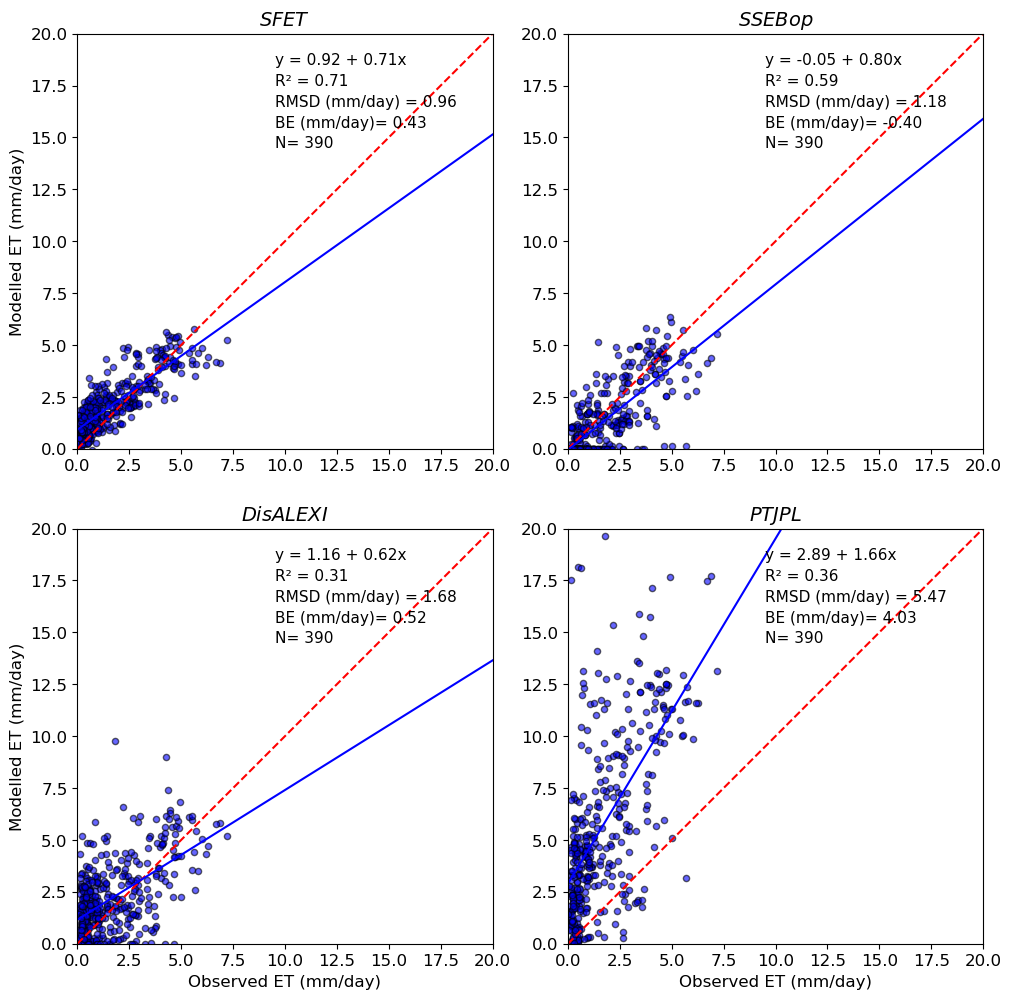

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import rcParams

rcParams.update({'font.family': 'sans-serif', 'font.size': 12})

file_path = "D:/Script/Data/Pooled_daily_Dis.xlsx"
daily_data = pd.read_excel(file_path)

data_list = {
    "SFET_Sitedata": pd.DataFrame({
        "measured": daily_data["LE_Obs"],
        "modelled": daily_data["LE_SFET"]
    }),
    "SSEBOP": pd.DataFrame({
        "measured": daily_data["LE_Obs"],
        "modelled": daily_data["SSEBOP"]
    }),
    "Disalexi": pd.DataFrame({
        "measured": daily_data["LE_Obs"],
        "modelled": daily_data["ECO3ETALEXI_001_EVAPOTRANSPIRATION_ALEXI_ETdaily"]
    }),
    "PTJPL": pd.DataFrame({
        "measured": daily_data["LE_Obs"],
        "modelled": daily_data["ECO3ETPTJPL_001_EVAPOTRANSPIRATION_PT_JPL_ETdaily"]
    })
}

def calc_metrics(data):
    mae = np.mean(np.abs(data["modelled"] - data["measured"]))
    rmse = np.sqrt(np.mean((data["modelled"] - data["measured"]) ** 2))
    pbias = np.mean(data["modelled"] - data["measured"])
    slope, intercept = np.polyfit(data["measured"], data["modelled"], 1)
    r2 = np.corrcoef(data["measured"], data["modelled"])[0, 1] ** 2
    n = len(data["measured"]) 
    return {"MAE": mae, "RMSE": rmse, "Pbias": pbias, "Slope": slope, "Intercept": intercept, "R2": r2, "N": n}


fig, axes = plt.subplots(2, 2, figsize=(10, 10), constrained_layout=True)
axes = axes.flatten() 

custom_titles = [
    r"$SFET$",
    r"$SSEBop$",
    r"$DisALEXI$",
    r"$PTJPL$"
]

for i, (ax, (key, data)) in enumerate(zip(axes, data_list.items())):
    metrics = calc_metrics(data)
    
    ax.scatter(data["measured"], data["modelled"], c="blue", alpha=0.6, edgecolor="k", s=20, label="Data points")
    ax.plot([0, 20], [0, 20], "r--", label="1:1 Line")  
    ax.plot([0, 20], [metrics["Intercept"], metrics["Intercept"] + metrics["Slope"] * 20], "b-", label="Fit Line")  
    ax.set_xlim(0, 20)
    ax.set_ylim(0, 20)
    ax.set_aspect("equal", adjustable="box")
    ax.set_title(custom_titles[i], fontsize=14, fontweight="bold") 
    

    if i >= 2:  
        ax.set_xlabel("Observed ET (mm/day)", fontsize=12, fontweight="normal")
    else:
        ax.set_xlabel("")  
    if i % 2 == 0: 
        ax.set_ylabel("Modelled ET (mm/day)", fontsize=12, fontweight="normal")
    ax.tick_params(axis="both", labelsize=12)
    
    # Annotate metrics
    ax.text(9.5, 18.5, f"y = {metrics['Intercept']:.2f} + {metrics['Slope']:.2f}x", fontsize=11)
    ax.text(9.5, 17.5, f"R² = {metrics['R2']:.2f}", fontsize=11)
    ax.text(9.5, 16.5, f"RMSD (mm/day) = {metrics['RMSE']:.2f}", fontsize=11)
    ax.text(9.5, 15.5, f"BE (mm/day)= {metrics['Pbias']:.2f}", fontsize=11)
    ax.text(9.5, 14.5, f"N= {metrics['N']:.0f}", fontsize=11)



plt.savefig('D:/Script/Plots_paper/FigS4.png', dpi=1000, bbox_inches='tight')

C:\Users\hpthakur.STUDENT\AppData\Local\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


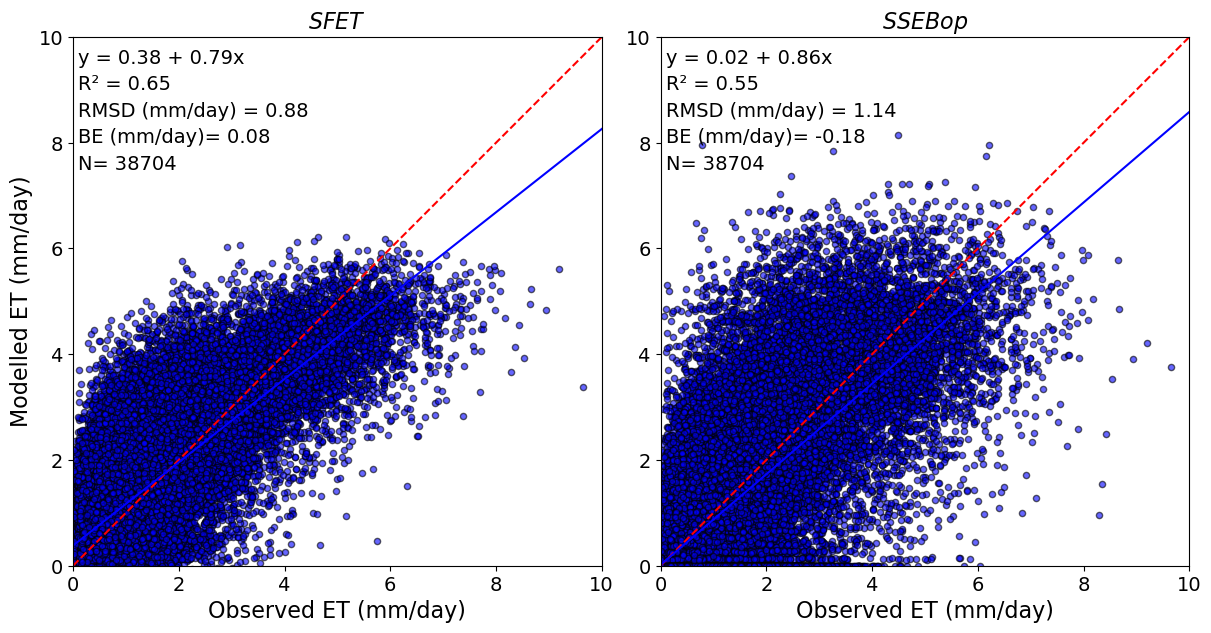

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import rcParams

rcParams.update({'font.family': 'sans-serif', 'font.size': 12})

file_path = "D:/Script/Data/Pooled_daily.xlsx"
daily_data = pd.read_excel(file_path)

data_list = {
    "SFET_Sitedata": pd.DataFrame({
        "measured": daily_data["LE_Obs"],
        "modelled": daily_data["LE_SFET"]
    }),
    "SSEBOp": pd.DataFrame({
        "measured": daily_data["LE_Obs"],
        "modelled": daily_data["SSEBOP"]
    })
}

def calc_metrics(data):
    mae = np.mean(np.abs(data["modelled"] - data["measured"]))
    rmse = np.sqrt(np.mean((data["modelled"] - data["measured"]) ** 2))
    pbias = np.mean(data["modelled"] - data["measured"])
    slope, intercept = np.polyfit(data["measured"], data["modelled"], 1)
    r2 = np.corrcoef(data["measured"], data["modelled"])[0, 1] ** 2
    n = len(data["measured"])  
    return {"MAE": mae, "RMSE": rmse, "Pbias": pbias, "Slope": slope, "Intercept": intercept, "R2": r2, "N": n}

fig, axes = plt.subplots(1, 2, figsize=(12, 10), constrained_layout=True)
axes = axes.flatten() 

custom_titles = [
    r"$SFET$",
    r"$SSEBop$"
]

for i, (ax, (key, data)) in enumerate(zip(axes, data_list.items())):
    metrics = calc_metrics(data)
    
    ax.scatter(data["measured"], data["modelled"], c="blue", alpha=0.6, edgecolor="k", s=20, label="Data points")
    ax.plot([0, 10], [0, 10], "r--", label="1:1 Line")  
    ax.plot([0, 10], [metrics["Intercept"], metrics["Intercept"] + metrics["Slope"] * 10], "b-", label="Fit Line")
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.set_aspect("equal", adjustable="box")
    ax.set_title(custom_titles[i], fontsize=16, fontweight="bold") 
    
    ax.set_xlabel("Observed ET (mm/day)", fontsize=16, fontweight="normal")
    if i == 0:  
        ax.set_ylabel("Modelled ET (mm/day)", fontsize=16, fontweight="normal")
    else:
        ax.set_ylabel("")  
    ax.tick_params(axis="both", labelsize=14)
    
    ax.text(0.1, 9.5, f"y = {metrics['Intercept']:.2f} + {metrics['Slope']:.2f}x", fontsize=14)
    ax.text(0.1, 9, f"R² = {metrics['R2']:.2f}", fontsize=14)
    ax.text(0.1, 8.5, f"RMSD (mm/day) = {metrics['RMSE']:.2f}", fontsize=14)
    ax.text(0.1, 8, f"BE (mm/day)= {metrics['Pbias']:.2f}", fontsize=14)
    ax.text(0.1, 7.5, f"N= {metrics['N']:.0f}", fontsize=14)

plt.savefig('D:/Script/Plots_paper/FigS3.png', dpi=500, bbox_inches='tight')

C:\Users\hpthakur.STUDENT\AppData\Local\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


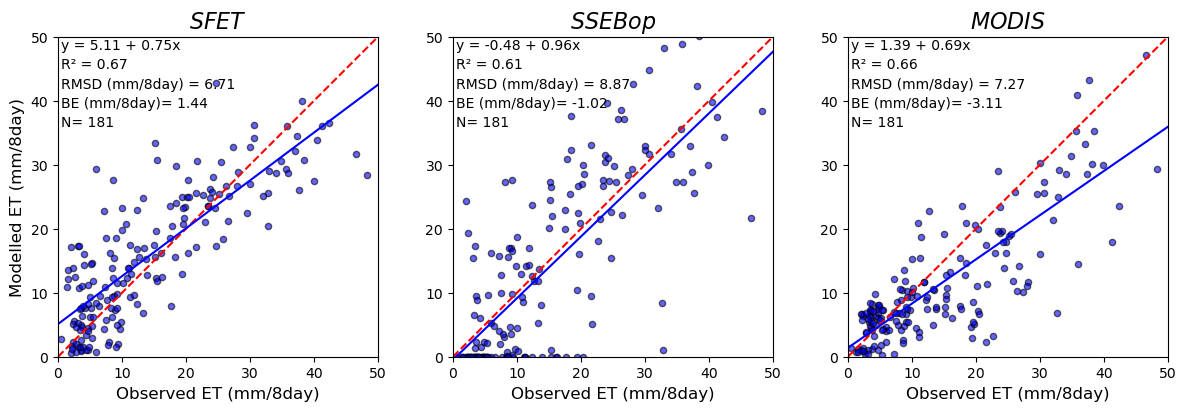

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import rcParams

rcParams.update({'font.family': 'sans-serif', 'font.size': 12})

file_path = "D:/Script/Data/Pooled_modis.xlsx"
daily_data = pd.read_excel(file_path)

data_list = {
    "SFET_Sitedata": pd.DataFrame({
        "measured": daily_data["LE_obs"],
        "modelled": daily_data["LE_sfet"]
    }),
    "SSEBop": pd.DataFrame({
        "measured": daily_data["LE_obs"],
        "modelled": daily_data["LE_SSEBOP"]
    }),
    "MODIS": pd.DataFrame({
        "measured": daily_data["LE_obs"],
        "modelled": daily_data["Modis_ET"]
    })
}

def calc_metrics(data):
    mae = np.mean(np.abs(data["modelled"] - data["measured"]))
    rmse = np.sqrt(np.mean((data["modelled"] - data["measured"]) ** 2))
    pbias = np.mean(data["modelled"] - data["measured"])
    slope, intercept = np.polyfit(data["measured"], data["modelled"], 1)
    r2 = np.corrcoef(data["measured"], data["modelled"])[0, 1] ** 2
    n = len(data["measured"])  
    return {"MAE": mae, "RMSE": rmse, "Pbias": pbias, "Slope": slope, "Intercept": intercept, "R2": r2, "N": n}


fig, axes = plt.subplots(1, 3, figsize=(12, 4), constrained_layout=True) 


custom_titles = [
    r"$SFET$",
    r"$SSEBop$",
    r"$MODIS$"
]

for i, (ax, (key, data)) in enumerate(zip(axes, data_list.items())):
    metrics = calc_metrics(data)
    
    ax.scatter(data["measured"], data["modelled"], c="blue", alpha=0.6, edgecolor="k", s=20) 
    
   
    ax.plot([0, 50], [0, 50], "r--")  
    ax.plot([0, 50], [metrics["Intercept"], metrics["Intercept"] + metrics["Slope"] * 50], "b-") 
    ax.set_xlim(0, 50)
    ax.set_ylim(0, 50)
    ax.set_aspect("equal", adjustable="box")
    ax.set_title(custom_titles[i], fontsize=16, fontweight="bold") 
    ax.set_xlabel("Observed ET (mm/8day)", fontsize=12, fontweight="normal")
    if i == 0:
        ax.set_ylabel("Modelled ET (mm/8day)", fontsize=12, fontweight="normal")
    ax.tick_params(axis="both", labelsize=10)
    
    ax.text(0.5, 48, f"y = {metrics['Intercept']:.2f} + {metrics['Slope']:.2f}x", fontsize=10)
    ax.text(0.5, 45, f"R² = {metrics['R2']:.2f}", fontsize=10)
    ax.text(0.5, 42, f"RMSD (mm/8day) = {metrics['RMSE']:.2f}", fontsize=10)
    ax.text(0.5, 39, f"BE (mm/8day)= {metrics['Pbias']:.2f}", fontsize=10)
    ax.text(0.5, 36, f"N= {metrics['N']:.0f}", fontsize=10)


plt.savefig('D:/Script/Plots_paper/FigS5.png', dpi=1000, bbox_inches='tight')
